In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('preprocessed_earthquake_data.csv')
X = data.drop(columns=['Magnitude', 'Type', 'Magnitude Type', 'Source', 'Status'])
y = data['Magnitude']

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [5]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
y_pred = rf_model.predict(X_val)

In [7]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [8]:
print(f'Random Forest Regression MAE: {mae:.4f}')
print(f'Random Forest Regression MSE: {mse:.4f}')
print(f'Random Forest Regression R² Score: {r2:.4f}')

Random Forest Regression MAE: 0.6938
Random Forest Regression MSE: 0.9059
Random Forest Regression R² Score: 0.1280


In [9]:
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

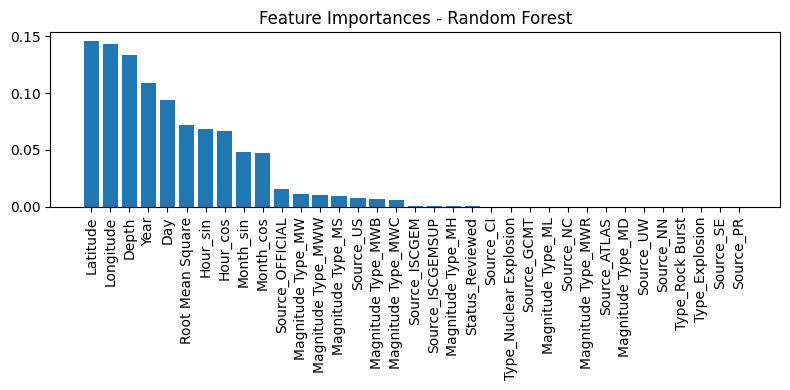

In [12]:
plt.figure(figsize=(8, 4))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [11]:
import joblib
joblib.dump(rf_model, 'random_forest_earthquake_model.pkl')

['random_forest_earthquake_model.pkl']